# TensorFlow 2.0 alpha - Demonstration of Overfitting & Underfitting
### Using the IMDb Dataset

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## OVERFITTING
#### The model is overfit when the model accuracy on the validation data peaks (and/or declines) after training a particular number of epochs. Training too long leads to pattern recognition that does not generalize to test data. Solutions to overfitting include adding more training data, and regularization.

## UNDERFITTING
#### This is the opposite occurence, when more training is needed. There is still room for the model accuracy to improve on the validation/test data. Underfitting can occur because the model is not strong enough, data has not been trained long enough, or because of over-regularization.

In [2]:
# Download the IMDb dataset

NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(
num_words=NUM_WORDS)

#### Generally with data this size an Embedding method would be used. Multi-hot encoding these lists into vectors (of 0s and 1s), results in 10000-dimensional vectors. 
#### For example, a [3, 5] sequence would be converted to a vector with 9998 0s, with 1s at the 3 and 5 positions.

In [5]:
# Multi-hot encode the lists
# Create an all-zero matrix of shape (len(sequences), dimension)
# Set specific indices of results[i] to 1s

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

### View Multi-Hot Vectors

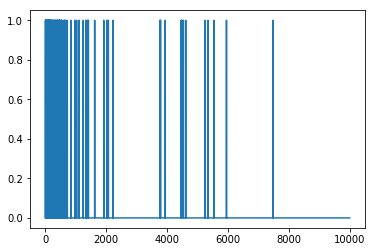

In [6]:
plt.plot(train_data[0])

#### word_indices are sorted by frequency - there should likely be more 1s near index zero, as is seen

# Demonstrate OVERFITTING

#### Regarding Deep Learning, one of the best ways to avoid overfitting is reducing the model size (or # of learnable parameters). Learnable parameters are determined by the # of layers and units per layer, and this is often referred to as the model's "capacity".
#### Deep Learning models typically perform well on training data, but the real challenge is generalization power.
#### Start with a simple model for a baseline - Create smaller and larger versions for comparison

In [8]:
# Create Baseline model

baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

# input_shape used only because it's necessary for .summary() to work

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 9s - loss: 0.4610 - accuracy: 0.8189 - binary_crossentropy: 0.4610 - val_loss: 0.3190 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3190
Epoch 2/20
25000/25000 - 8s - loss: 0.2365 - accuracy: 0.9156 - binary_crossentropy: 0.2365 - val_loss: 0.2823 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2823
Epoch 3/20
25000/25000 - 6s - loss: 0.1743 - accuracy: 0.9391 - binary_crossentropy: 0.1743 - val_loss: 0.2951 - val_accuracy: 0.8828 - val_binary_crossentropy: 0.2951
Epoch 4/20
25000/25000 - 5s - loss: 0.1413 - accuracy: 0.9522 - binary_crossentropy: 0.1413 - val_loss: 0.3392 - val_accuracy: 0.8701 - val_binary_crossentropy: 0.3392
Epoch 5/20
25000/25000 - 5s - loss: 0.1150 - accuracy: 0.9626 - binary_crossentropy: 0.1150 - val_loss: 0.3451 - val_accuracy: 0.8727 - val_binary_crossentropy: 0.3451
Epoch 6/20
25000/25000 - 5s - loss: 0.0925 - accuracy: 0.9723 - binary_crossentropy: 0.0925 - val_loss: 0.3769

### Create a Smaller Model

In [10]:
# Create model with less hidden layers - to compare to baseline

smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Train model - using the same data

smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 9s - loss: 0.6208 - accuracy: 0.7580 - binary_crossentropy: 0.6208 - val_loss: 0.5212 - val_accuracy: 0.8303 - val_binary_crossentropy: 0.5212
Epoch 2/20
25000/25000 - 7s - loss: 0.4147 - accuracy: 0.8719 - binary_crossentropy: 0.4147 - val_loss: 0.3734 - val_accuracy: 0.8716 - val_binary_crossentropy: 0.3734
Epoch 3/20
25000/25000 - 5s - loss: 0.2966 - accuracy: 0.9040 - binary_crossentropy: 0.2966 - val_loss: 0.3176 - val_accuracy: 0.8801 - val_binary_crossentropy: 0.3176
Epoch 4/20
25000/25000 - 5s - loss: 0.2393 - accuracy: 0.9207 - binary_crossentropy: 0.2393 - val_loss: 0.2937 - val_accuracy: 0.8843 - val_binary_crossentropy: 0.2937
Epoch 5/20
25000/25000 - 5s - loss: 0.2038 - accuracy: 0.9321 - binary_crossentropy: 0.2038 - val_loss: 0.2843 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2843
Epoch 6/20
25000/25000 - 5s - loss: 0.1795 - accuracy: 0.9400 - binary_crossentropy: 0.1795 - val_loss: 0.2831

### Create a Bigger Model

In [12]:
# Create a larger model - with great capacity - subject to overfitting

bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train the model - using the same data

bigger_history = bigger_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 17s - loss: 0.3415 - accuracy: 0.8538 - binary_crossentropy: 0.3415 - val_loss: 0.2963 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.2963
Epoch 2/20
25000/25000 - 16s - loss: 0.1455 - accuracy: 0.9468 - binary_crossentropy: 0.1455 - val_loss: 0.3345 - val_accuracy: 0.8707 - val_binary_crossentropy: 0.3345
Epoch 3/20
25000/25000 - 15s - loss: 0.0496 - accuracy: 0.9856 - binary_crossentropy: 0.0496 - val_loss: 0.4543 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.4543
Epoch 4/20
25000/25000 - 15s - loss: 0.0072 - accuracy: 0.9990 - binary_crossentropy: 0.0072 - val_loss: 0.5966 - val_accuracy: 0.8685 - val_binary_crossentropy: 0.5966
Epoch 5/20
25000/25000 - 15s - loss: 7.5975e-04 - accuracy: 1.0000 - binary_crossentropy: 7.5975e-04 - val_loss: 0.6939 - val_accuracy: 0.8686 - val_binary_crossentropy: 0.6939
Epoch 6/20
25000/25000 - 15s - loss: 2.2041e-04 - accuracy: 1.0000 - binary_crossentropy: 2.2041e

## Plot the Training and Validation Loss

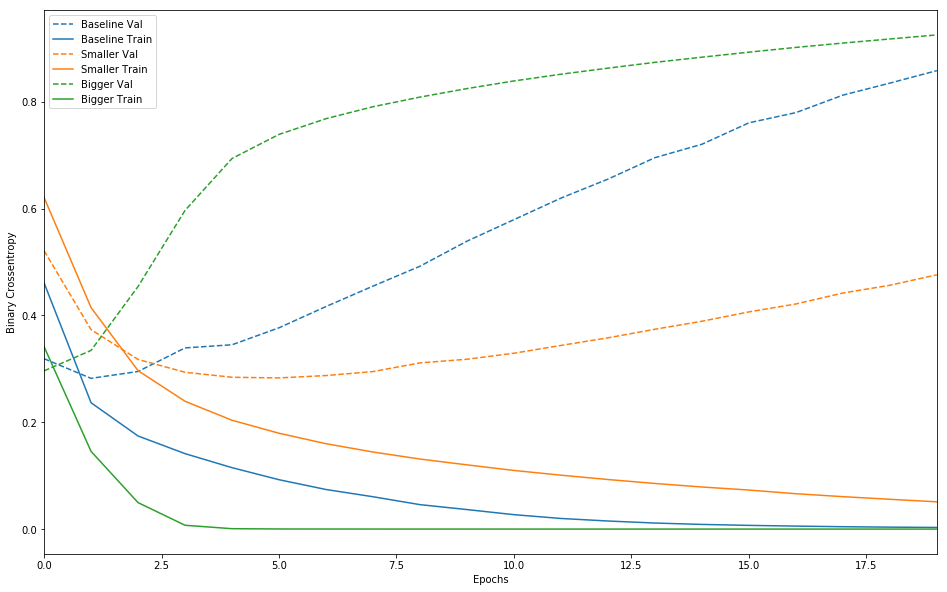

In [14]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

#### The lower the validation loss (dotted lines), the better the model
#### The Smaller Network begins overfitting after more epochs than the others, and it overfits less severely
#### The Larger Network begins overfitting almost immediately - the greater the capacity the more susceptible to overfitting (though the quicker the modeling of the training data)

## Strategies for Preventing/Addressing Overfitting

### Weight Regularization 
#### Generally you want to go with simplicity over complexity. One way of managing this with Networks is altering the Weight values
#### A common way to deal with overfitting is to place constraints on the model complexity by keeping the Weights at small values. Weight regularization, keeps the distribution more 'regular' with less entropy - This is accomplished by adding a Cost (associated w larger weights - as L1 or L2 regularization), to the Network's Loss Function

In [18]:
# Add L2 regularization - pass weight regularizer instances to layers

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

# L1 regularization introduces sparsity, which makes some weight parameters zero
# L2 regularization does not make them sparse, why it may be used more commonly

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 13s - loss: 0.5462 - accuracy: 0.7905 - binary_crossentropy: 0.5075 - val_loss: 0.4074 - val_accuracy: 0.8705 - val_binary_crossentropy: 0.3678
Epoch 2/20
25000/25000 - 11s - loss: 0.3293 - accuracy: 0.9018 - binary_crossentropy: 0.2854 - val_loss: 0.3431 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2959
Epoch 3/20
25000/25000 - 11s - loss: 0.2705 - accuracy: 0.9240 - binary_crossentropy: 0.2210 - val_loss: 0.3360 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2848
Epoch 4/20
25000/25000 - 11s - loss: 0.2437 - accuracy: 0.9351 - binary_crossentropy: 0.1909 - val_loss: 0.3412 - val_accuracy: 0.8840 - val_binary_crossentropy: 0.2873
Epoch 5/20
25000/25000 - 9s - loss: 0.2254 - accuracy: 0.9425 - binary_crossentropy: 0.1704 - val_loss: 0.3500 - val_accuracy: 0.8819 - val_binary_crossentropy: 0.2942
Epoch 6/20
25000/25000 - 9s - loss: 0.2121 - accuracy: 0.9489 - binary_crossentropy: 0.1553 - val_loss: 0.

#### L2(0.001) - every weight matrix coefficient of the layer will add - 0.001 * weight_coefficient_value ** 2 - to the Total Network Loss 

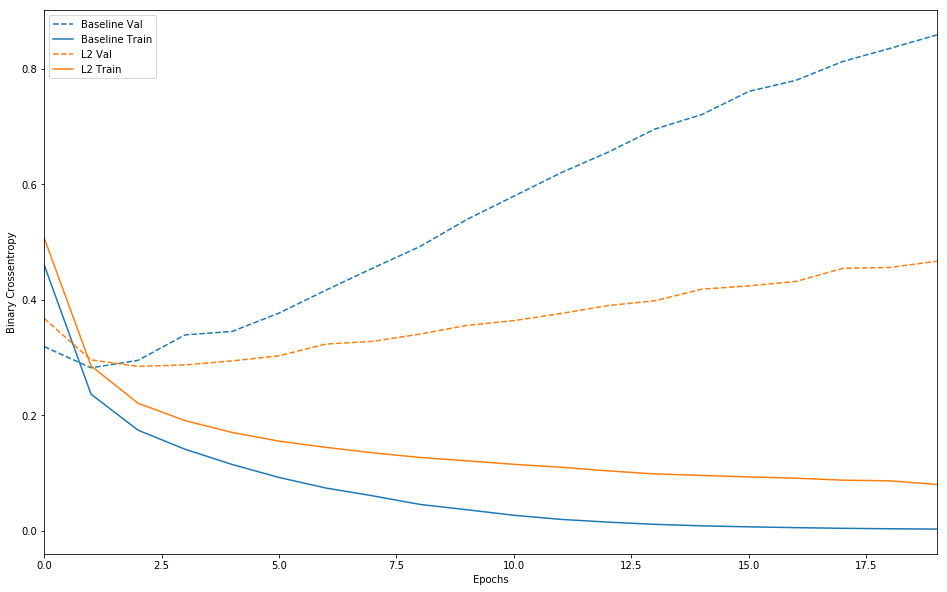

In [19]:
# Plot the impact of the L2 regularization penalty

plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

### Add Dropout
#### Dropout - one of the most effective and common regularization techniques for Neural Networks
#### It is done by randomly 'dropping out' (setting to zero), a number of output features of the layer - during Training - at a dropout Rate (fraction of features dropped out, usually 0.2 - 0.5)
#### Features are NoT dropped from Testing - and output values are scaled down by factor (equal to dropout Rate)

In [23]:
# Add 2 Dropout layers - reduce overfitting
# done by introducing dropout layers, applied to the layer preceeding it

dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 8s - loss: 0.6135 - accuracy: 0.6552 - binary_crossentropy: 0.6135 - val_loss: 0.4626 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.4626
Epoch 2/20
25000/25000 - 6s - loss: 0.4403 - accuracy: 0.8079 - binary_crossentropy: 0.4403 - val_loss: 0.3291 - val_accuracy: 0.8820 - val_binary_crossentropy: 0.3291
Epoch 3/20
25000/25000 - 4s - loss: 0.3415 - accuracy: 0.8650 - binary_crossentropy: 0.3415 - val_loss: 0.2828 - val_accuracy: 0.8885 - val_binary_crossentropy: 0.2828
Epoch 4/20
25000/25000 - 4s - loss: 0.2834 - accuracy: 0.8954 - binary_crossentropy: 0.2834 - val_loss: 0.2793 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.2793
Epoch 5/20
25000/25000 - 6s - loss: 0.2360 - accuracy: 0.9148 - binary_crossentropy: 0.2360 - val_loss: 0.2755 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2755
Epoch 6/20
25000/25000 - 5s - loss: 0.2108 - accuracy: 0.9238 - binary_crossentropy: 0.2108 - val_loss: 0.2904

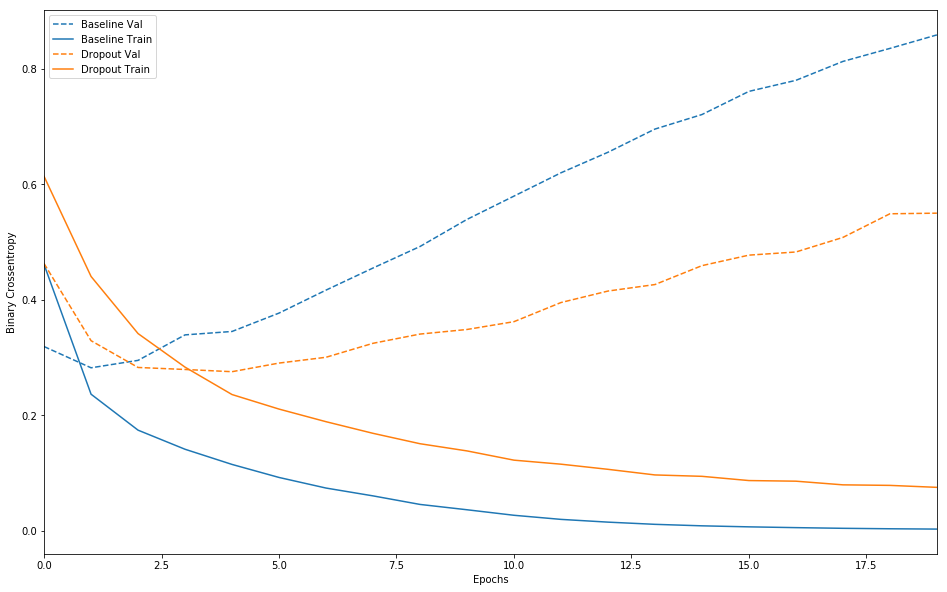

In [24]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])

### Adding Dropout reveals improvement over the baseline

# CONCLUSION 
### Look to reduce Overfitting in Neural Networks by - (1) getting more training data (2) reducin Network Capacity (3) adding Weight regularization (4) adding Dropout

In [25]:
# some notes for this tutorial can be found on tensorflow.org - Permission granted
#
#@title MIT License
#
# Copyright (c) 2017 François Chollet